## Plots analzing Investment cost adjustments

Import packages

In [51]:
import pandas as pd 
import matplotlib.pyplot as plt

Import data sets (investment case base, +/- 10-30%)

In [52]:
df_base = pd.read_csv("CSV_Results/results_output_gen_base.csv")
df_inv_n10 = pd.read_csv("CSV_Results/results_output_gen_n10inv.csv")
df_inv_n20 = pd.read_csv("CSV_Results/results_output_gen_n20inv.csv")
df_inv_n30 = pd.read_csv("CSV_Results/results_output_gen_n30inv.csv")
df_inv_p10 = pd.read_csv("CSV_Results/results_output_gen_p10inv.csv")
df_inv_p20 = pd.read_csv("CSV_Results/results_output_gen_p20inv.csv")
df_inv_p30 = pd.read_csv("CSV_Results/results_output_gen_p30inv.csv")

Add case column

In [53]:
df_base['Case'] = 'Base Case'
df_inv_n10['Case'] = 'Investment-10%'
df_inv_n20['Case'] = 'Investment-20%'
df_inv_n30['Case'] = 'Investment-30%'
df_inv_p10['Case'] = 'Investment+10%'
df_inv_p20['Case'] = 'Investment+20%'
df_inv_p30['Case'] = 'Investment+30%'

Merge data sets

In [54]:
frames = [df_inv_n30, df_inv_n20, df_inv_n10, df_base, df_inv_p10, df_inv_p20, df_inv_p30]
df_gen = pd.concat(frames)

All unique energy sources

In [55]:
df_gen["GeneratorType"].unique()

array(['Liginiteexisting', 'Lignite', 'LigniteCCSadv', 'Coalexisting',
       'Coal', 'CoalCCSadv', 'Gasexisting', 'GasOCGT', 'GasCCGT',
       'GasCCSadv', 'Oilexisting', 'Bioexisting', 'Bio10cofiring', 'Wave',
       'Geo', 'Hydroregulated', 'Hydrorun-of-the-river', 'Bio',
       'Windonshore', 'Windoffshoregrounded', 'Solar', 'Bio10cofiringCCS',
       'LigniteCCSsup', 'CoalCCS', 'GasCCS', 'Waste',
       'Windoffshorefloating', 'Nuclear'], dtype=object)

Select only offshore wind sources (floating and grounded)

In [56]:
df_ow = df_gen[(df_gen['GeneratorType'] == 'Windoffshorefloating') | (df_gen['GeneratorType'] == 'Windoffshoregrounded')]
df_ow_floating = df_ow[(df_ow['GeneratorType'] == 'Windoffshorefloating')]
df_ow_grounded = df_ow[(df_ow['GeneratorType'] == 'Windoffshoregrounded')]
df_ow

,Node,GeneratorType,Period,genInvCap_MW,genInstalledCap_MW,genExpectedCapacityFactor,DiscountedInvestmentCost_Euro,genExpectedAnnualProduction_GWh,Case
3296,Belgium,Windoffshoregrounded,2020-2025,0.000000,0.000000,0.000000,0.000000e+00,0.000000,Investment-30%
3297,Belgium,Windoffshoregrounded,2025-2030,0.000000,0.000000,0.000000,0.000000e+00,0.000000,Investment-30%
3298,Belgium,Windoffshoregrounded,2030-2035,0.000000,0.000000,0.000000,0.000000e+00,0.000000,Investment-30%
3299,Belgium,Windoffshoregrounded,2035-2040,0.000000,0.000000,0.000000,0.000000e+00,0.000000,Investment-30%
3300,Belgium,Windoffshoregrounded,2040-2045,0.000000,0.000000,0.000000,0.000000e+00,0.000000,Investment-30%
...,...,...,...,...,...,...,...,...,...
5283,SorligeNordsjoII,Windoffshorefloating,2035-2040,382.938748,382.946776,0.504211,7.326468e+08,1691.432882,Investment+30%
5284,SorligeNordsjoII,Windoffshorefloating,2040-2045,1456.550170,1839.496945,0.449320,1.783706e+09,7240.347272,Investment+30%
5285,SorligeNordsjoII,Windoffshorefloating,2045-2050,1092.036367,2931.532910,0.487091,8.612397e+08,12508.598249,Investment+30%
5286,SorligeNordsjoII,Windoffshorefloating,2050-2055,0.000042,2931.532369,0.437415,1.883293e+01,11232.921791,Investment+30%


### Plots installed offshore wind capacity in Europe (GW) by period

#### Offshore wind total (grounded + floating)

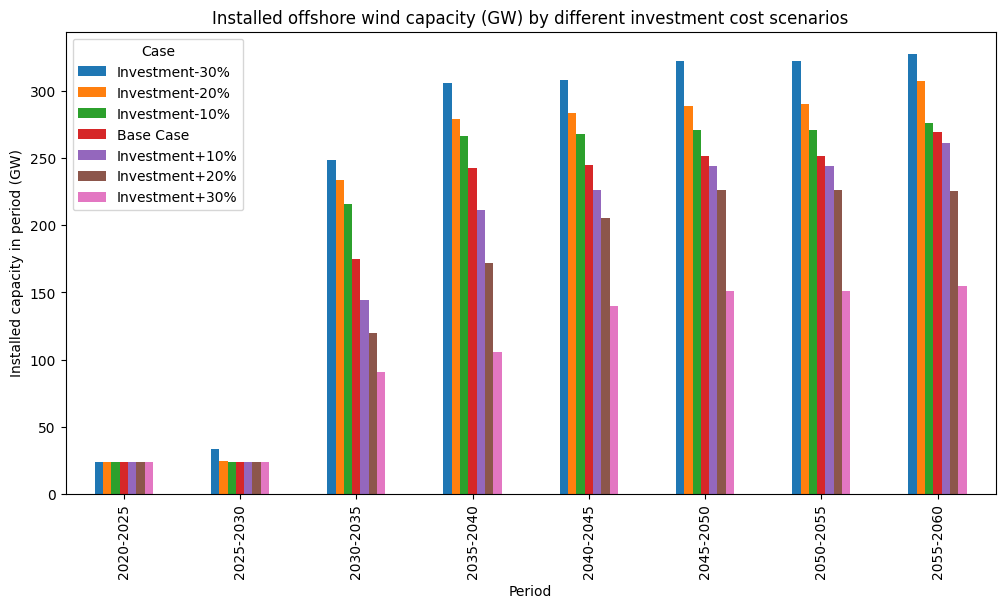

In [76]:
# Group the data by 'Period' and 'Case' and sum the 'genInstalledCap_MW' for each group
grouped_data = df_ow.groupby(['Period', 'Case'])['genInstalledCap_MW'].sum().unstack()

# Convert the summed values from MW to GW by dividing by 1000
grouped_data = grouped_data / 1000

case_order = ['Investment-30%', 'Investment-20%', 'Investment-10%', 'Base Case', 'Investment+10%', 'Investment+20%', 'Investment+30%']

# Plot the grouped data as a bar chart
ax = grouped_data[case_order].plot(kind='bar', figsize=(12, 6))

# Customize the chart
plt.title('Installed offshore wind capacity (GW) by different investment cost scenarios')
plt.xlabel('Period')
plt.ylabel('Installed capacity in period (GW)')
plt.legend(title='Case', loc='upper left')

plt.show()

#### Grounded

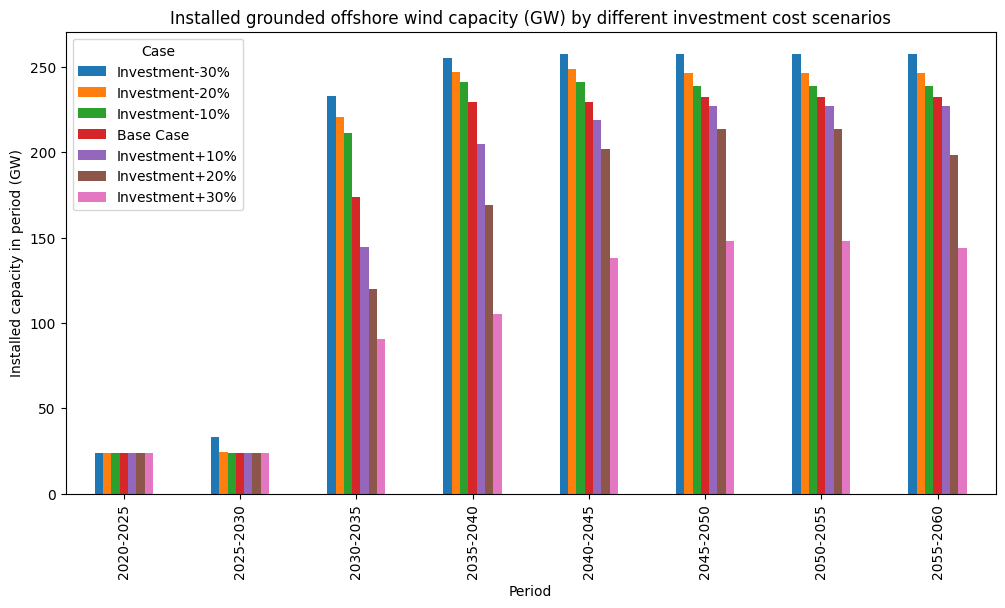

In [77]:
# Group the data by 'Period' and 'Case' and sum the 'genInstalledCap_MW' for each group
grouped_data = df_ow_grounded.groupby(['Period', 'Case'])['genInstalledCap_MW'].sum().unstack()

# Convert the summed values from MW to GW by dividing by 1000
grouped_data = grouped_data / 1000

case_order = ['Investment-30%', 'Investment-20%', 'Investment-10%', 'Base Case', 'Investment+10%', 'Investment+20%', 'Investment+30%']

# Plot the grouped data as a bar chart
ax = grouped_data[case_order].plot(kind='bar', figsize=(12, 6))

# Customize the chart
plt.title('Installed grounded offshore wind capacity (GW) by different investment cost scenarios')
plt.xlabel('Period')
plt.ylabel('Installed capacity in period (GW)')
plt.legend(title='Case', loc='upper left')

plt.show()

#### Floating

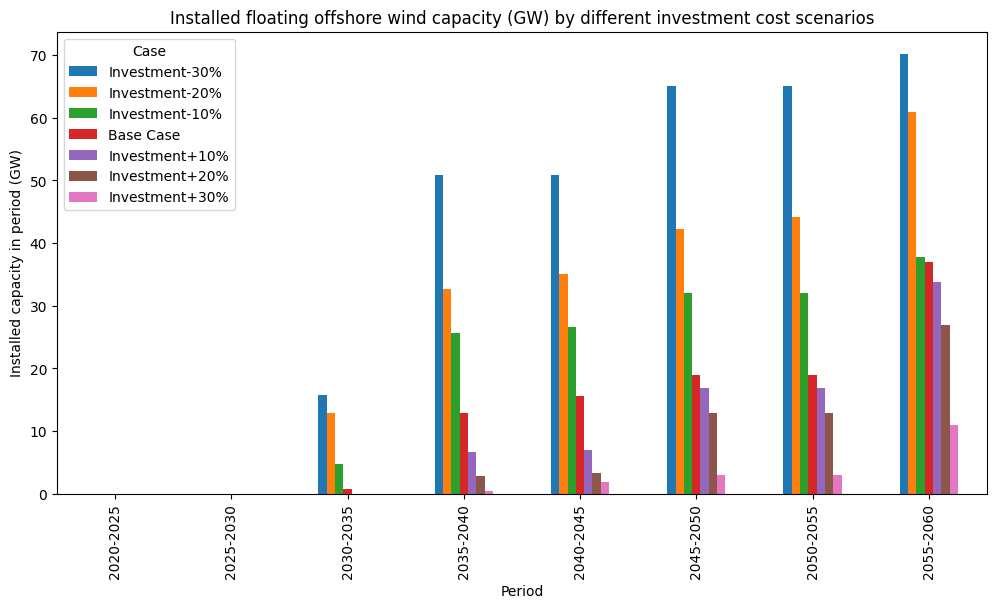

In [78]:
# Group the data by 'Period' and 'Case' and sum the 'genInstalledCap_MW' for each group
grouped_data = df_ow_floating.groupby(['Period', 'Case'])['genInstalledCap_MW'].sum().unstack()

# Convert the summed values from MW to GW by dividing by 1000
grouped_data = grouped_data / 1000

case_order = ['Investment-30%', 'Investment-20%', 'Investment-10%', 'Base Case', 'Investment+10%', 'Investment+20%', 'Investment+30%']

# Plot the grouped data as a bar chart
ax = grouped_data[case_order].plot(kind='bar', figsize=(12, 6))

# Customize the chart
plt.title('Installed floating offshore wind capacity (GW) by different investment cost scenarios')
plt.xlabel('Period')
plt.ylabel('Installed capacity in period (GW)')
plt.legend(title='Case', loc='upper left')

plt.show()

### In Norway

In [79]:
df_gen["Node"].unique()

array(['BosniaH', 'Bulgaria', 'CzechR', 'Germany', 'Estonia', 'Greece',
       'Hungary', 'Ireland', 'Macedonia', 'Poland', 'Romania', 'Serbia',
       'Slovenia', 'Slovakia', 'Austria', 'Denmark', 'Spain', 'Finland',
       'France', 'GreatBrit.', 'Croatia', 'Italy', 'Latvia',
       'Netherlands', 'Portugal', 'Sweden', 'Belgium', 'Lithuania',
       'Luxemb.', 'Switzerland', 'NO1', 'NO2', 'NO3', 'NO4', 'NO5',
       'MorayFirth', 'FirthofForth', 'DoggerBank', 'Hornsea',
       'OuterDowsing', 'Norfolk', 'EastAnglia', 'Borssele',
       'HollandseeKust', 'HelgolanderBucht', 'Nordsoen', 'UtsiraNord',
       'SorligeNordsjoI', 'SorligeNordsjoII'], dtype=object)

Utsira Nord, Sørlige Nordsjø I + II = Norge

In [80]:
nodes_to_include = ["UtsiraNord", "SorligeNordsjoI", "SorligeNordsjoII"]

# Use the isin method to filter the DataFrame
df_ow_NO = df_ow[df_ow['Node'].isin(nodes_to_include)]
df_ow_NO_floating = df_ow_NO[(df_ow_NO['GeneratorType'] == 'Windoffshorefloating')]
df_ow_NO_grounded = df_ow_NO[(df_ow_NO['GeneratorType'] == 'Windoffshoregrounded')]
df_ow_NO["genInstalledCap_MW"].sum()

829524.8664153602

#### Offshore wind total (grounded + floating)

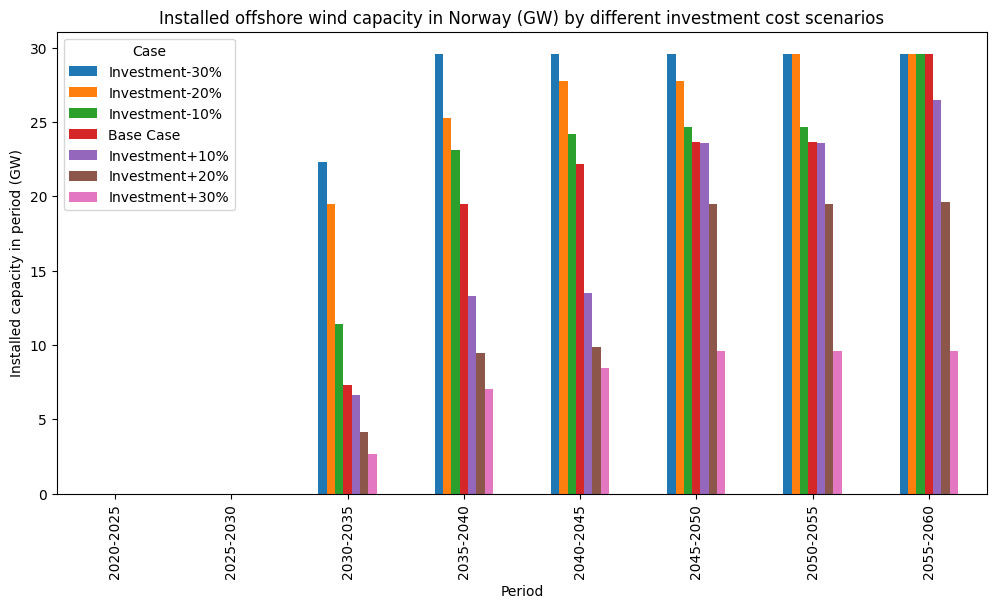

In [81]:
# Group the data by 'Period' and 'Case' and sum the 'genInstalledCap_MW' for each group
grouped_data = df_ow_NO.groupby(['Period', 'Case'])['genInstalledCap_MW'].sum().unstack()

# Convert the summed values from MW to GW by dividing by 1000
grouped_data = grouped_data / 1000

case_order = ['Investment-30%', 'Investment-20%', 'Investment-10%', 'Base Case', 'Investment+10%', 'Investment+20%', 'Investment+30%']

# Plot the grouped data as a bar chart
ax = grouped_data[case_order].plot(kind='bar', figsize=(12, 6))

# Customize the chart
plt.title('Installed offshore wind capacity in Norway (GW) by different investment cost scenarios')
plt.xlabel('Period')
plt.ylabel('Installed capacity in period (GW)')
plt.legend(title='Case', loc='upper left')

plt.show()

#### Floating

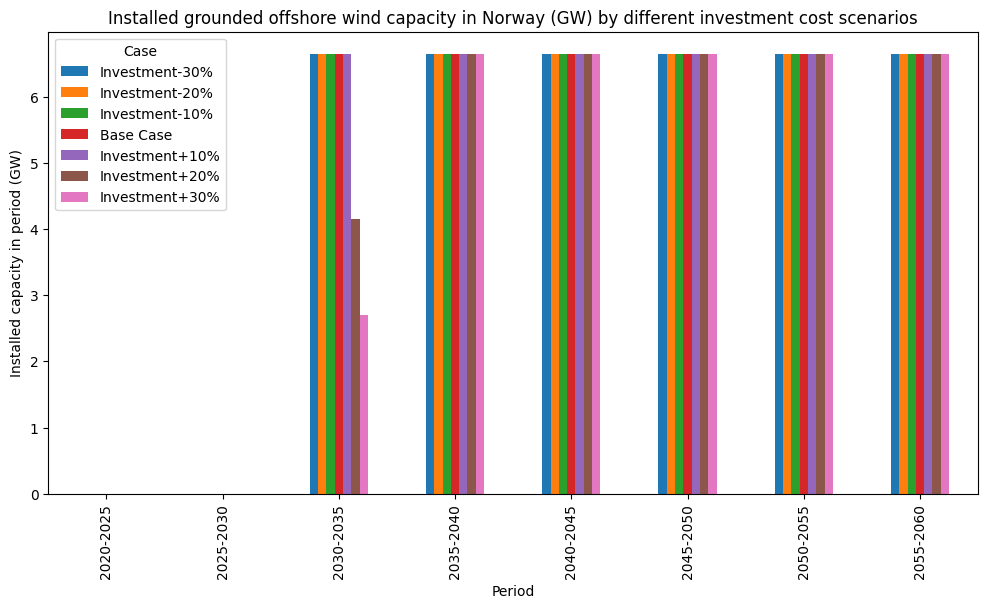

In [82]:
# Group the data by 'Period' and 'Case' and sum the 'genInstalledCap_MW' for each group
grouped_data = df_ow_NO_grounded.groupby(['Period', 'Case'])['genInstalledCap_MW'].sum().unstack()

# Convert the summed values from MW to GW by dividing by 1000
grouped_data = grouped_data / 1000

case_order = ['Investment-30%', 'Investment-20%', 'Investment-10%', 'Base Case', 'Investment+10%', 'Investment+20%', 'Investment+30%']

# Plot the grouped data as a bar chart
ax = grouped_data[case_order].plot(kind='bar', figsize=(12, 6))

# Customize the chart
plt.title('Installed grounded offshore wind capacity in Norway (GW) by different investment cost scenarios')
plt.xlabel('Period')
plt.ylabel('Installed capacity in period (GW)')
plt.legend(title='Case', loc='upper left')

plt.show()

#### Grounded

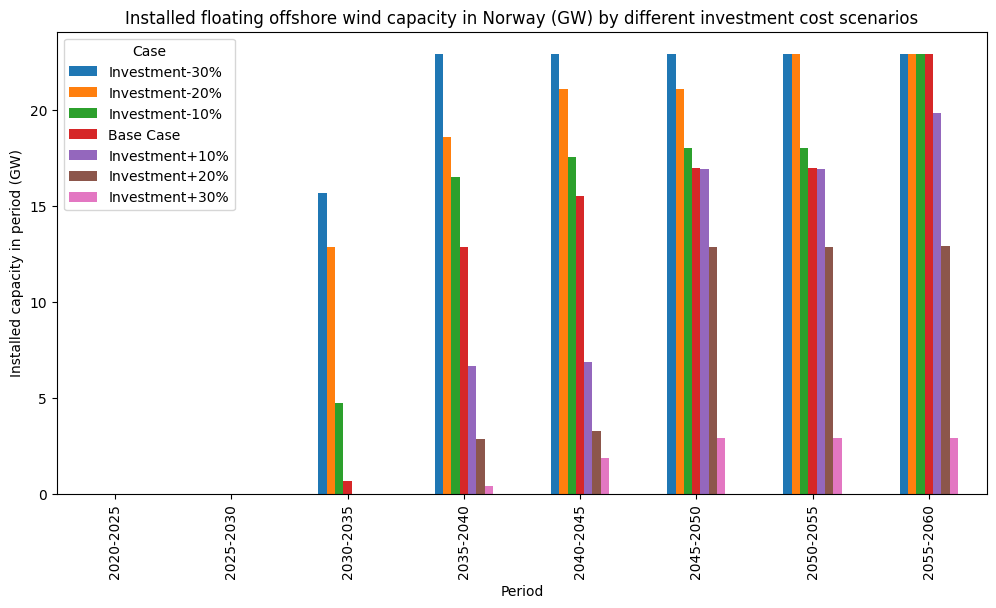

In [83]:
# Group the data by 'Period' and 'Case' and sum the 'genInstalledCap_MW' for each group
grouped_data = df_ow_NO_floating.groupby(['Period', 'Case'])['genInstalledCap_MW'].sum().unstack()

# Convert the summed values from MW to GW by dividing by 1000
grouped_data = grouped_data / 1000

case_order = ['Investment-30%', 'Investment-20%', 'Investment-10%', 'Base Case', 'Investment+10%', 'Investment+20%', 'Investment+30%']

# Plot the grouped data as a bar chart
ax = grouped_data[case_order].plot(kind='bar', figsize=(12, 6))

# Customize the chart
plt.title('Installed floating offshore wind capacity in Norway (GW) by different investment cost scenarios')
plt.xlabel('Period')
plt.ylabel('Installed capacity in period (GW)')
plt.legend(title='Case', loc='upper left')

plt.show()